In [1]:
import nltk

In [2]:
import pandas
from pandas import Series, DataFrame

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import webbrowser

# PArt 1 - Data

In [7]:
#Our data source. Download the file named "smsspamcollection.zip"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/" 

In [6]:
webbrowser.open_new_tab(url)

True

In [14]:
#Import message file to python notebook
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [15]:
#Viewing first 10 messages
for message_no, message in enumerate(messages[:10]):
    print(message_no,message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

So basicaally we have 3 columns, first one is index, allocated by enumerate. 2nd is classification<br>
ham : Not spam message<br>
spam : A spam message<br>
3rd column is the actual text message.

# Part 2 - Basic Exploration of Data

In [12]:
#converting message file to pandas dataframe
message_df = pandas.read_csv("smsspamcollection/SMSSpamCollection",sep="\t",names=["label","SM"])
message_df.head()

,label,SM
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
message_df.describe()

,label,SM
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


So in our dataset we have 5572 messages, divided into two categories(ham and spam). The highest category is ham.

In [16]:
message_df.groupby("label").describe()

SM                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [18]:
#Counting length of each text message
message_df["length"] = message_df["SM"].apply(len)
message_df.head()

,label,SM,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


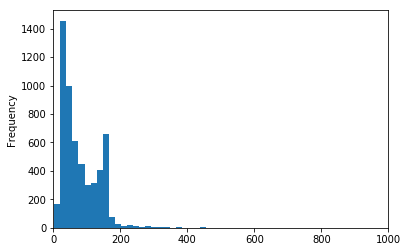

In [25]:
#Lets make a histogram of message length
message_df.length.plot(kind="hist",bins=50,xlim=(0,1000))

SO it seems the maximum SMs have length between 10 to 140 characters while there are many long messages which skew our graph. Lets try to find them.

In [24]:
message_df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
#Max length is 910 characters. Lets find that message.
message_df[message_df["length"] == 910]

,label,SM,length
1085,ham,For me the love should start with attraction.i...,910


In [29]:
#Viewing complete text
message_df[message_df["length"] == 910]["SM"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Let us visualize messages based on category

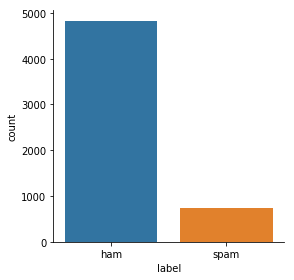

In [33]:
sns.factorplot("label",data=message_df,kind="count")

So we have quite a lot non-spam messages compared to spam ones.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025893BE9668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000025893C8D908>], dtype=object)

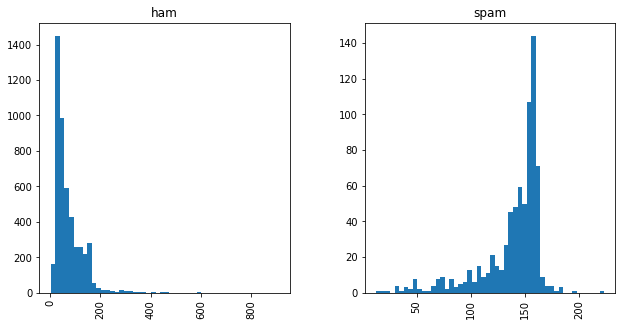

In [30]:
message_df.hist(column="length",by="label",bins=50,figsize=(10,5))

(0, 200)

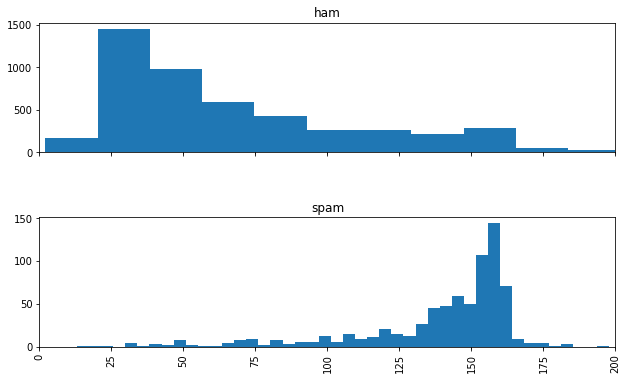

In [40]:
#Clipping ou non-spam messages with character length more than 200.
message_df.hist(column='length', by='label', bins=50,figsize=(10,6), sharex="True",layout=(2,1))
plt.xlim(0,200)

The non-spam messages seem to have smaller length compared to spam messages

As now we have analysed the message, using these labeled ham and spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.

# Part 3 - Text pre-processing

All the data which we have is in text format, but for duing mathematical analysis, they need to be converted to some sort of numerical vector. This is done by <b>Bag_of_Word</b> technique wherein each word is given a unique number.

In [41]:
import string

In [42]:
#Before doing any analysis let us try some exapmles
test_str = "This is a test string. It has unique punctuation!"

In [43]:
string.punctuation #Getting list of punctuations from string library

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
#Removing all punctuations from test string
no_punc = [char for char in test_str if char not in string.punctuation]
no_punc = "".join(no_punc)

In [67]:
no_punc #Test sting with punctuations removed.

'This is a test string It has unique punctuation'

Now we will see how we can remove <b>stop_words</b>. These are the most commonly used words in day to day converstion. It can be achived by using <b>stopwords</b> module of <b>nltk.corpus</b> library.

In [48]:
from nltk.corpus import stopwords

In [52]:
#List of first 10 stop words in English language
stopwords.words("English")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [76]:
#removing stop words from our test string
#We split each word from test string with no punctuation, turn to lower case and remove it if found in stop words' list
clean_test_str = [word for word in no_punc.split() if word.lower() not in stopwords.words("English")]

In [77]:
#Test string with all punctuations and stop words removed.
clean_test_str

['test', 'string', 'unique', 'punctuation']

Now we will apply the same techinuqe of - 
1. Removing Punctuation
2. Removing stop words
3. Making a clean text

to our messages_df dataframe.

In [78]:
#Function to process and clean up the text
def text_process(mess):
    #Removing punctuations
    nopunc = [char for char in mess if char not in string.punctuation]
    #Joining chars to make string
    nopunc = "".join(nopunc)
    #Remove stop words
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("English")]

In [79]:
#Original dataframe
message_df.head()

,label,SM,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let us convert the text SMs to <b>tokens</b> which basically means remove all unecessary words.

In [83]:
#Applying text_process function to first five text SMs
message_df["SM"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: SM, dtype: object

The method of normalizing text explained above is the most basic one. It does not take into account of vague language or short-hand messages like typing <i>msg</i> instead of <i>message</i> and so on. But they can be accounted by in-depth analysis of <a href = "http://www.nltk.org/book/">NLTK</a>.

# Part 4 - Vectorization of data

So far we have cleaned our data and got rid of any punctuations and commonly used words. Noww we will vectorize our data.<br>
We will convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.<br>
We'll do that in three steps using the bag-of-words model:
<ul><li>Count how many times does a word occur in each message (Known as <b>term frequency</b>)
<li>Weigh the counts, so that frequent tokens get lower weight (<b>inverse document frequency</b>)
<li>Normalize the vectors to unit length, to abstract from the original text length (<b>L2 norm</b>)</ul>

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use **SciKit** Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a **Sparse Matrix**.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the analyzer to be our own previously defined function

In [85]:
#Clean all text messages and extract all unique words
bag_of_word_transformer = CountVectorizer(analyzer=text_process).fit(message_df["SM"])

So the **bag_of_word_transformer** is taking each SM from our dataset, applying **text_process()** function and then vectorizing each message.

In [89]:
print(len(bag_of_word_transformer.vocabulary_))

11425


So our text vectorizer found 11425 unique words in whole dataset. Let us take one text message from dataset and see the results of vectorization.

In [92]:
#View original message #4 at index 3
SM4 = message_df["SM"][3]
SM4

'U dun say so early hor... U c already then say...'

In [95]:
#Now lets see vector representation
bag_of_word_transformer4 = bag_of_word_transformer.transform([SM4])
print(bag_of_word_transformer4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


So our message has total seven unique words of which two words appear twice each.

In [99]:
print(bag_of_word_transformer.get_feature_names()[4068])
print(bag_of_word_transformer.get_feature_names()[9554])

U
say


The word "_U_" and "_say_" indeed occured twice in our 4th text message.<br>
Let us now perform vectorization on our entire dataframe and analyse the result.

In [100]:
#Grab all the unique word from dataset and vectorize them
SM_bag_of_words = bag_of_word_transformer.transform(message_df["SM"])

Let us see details of transformed vector

In [102]:
print('Shape of Sparse Matrix: ', SM_bag_of_words.shape)
print('Amount of Non-Zero occurences: ', SM_bag_of_words.nnz)
print('sparsity: %.2f%%' % (100.0 * SM_bag_of_words.nnz / (SM_bag_of_words.shape[0] * SM_bag_of_words.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


After vectorization we need to perform TF-IDF on our vector.<br>
<i>TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).<br>
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).</i><br>
Example:<br>
Consider a document containing 100 words wherein the word cat appears 3 times. 
The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03.<br>
Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. <br>
Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [104]:
#We will import module from sklearn to calculate tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
#Perform tf-idf of extracted vector of unique words
tfid_transformer = TfidfTransformer().fit(SM_bag_of_words)

In [109]:
#Pracctice on text message at index 3
tfid_transformer4 = tfid_transformer.transform(bag_of_word_transformer4)
print(tfid_transformer4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


The above step brings out the tfidf of all unique words in message No. 4. Let us see idf of some words

In [111]:
print(tfid_transformer.idf_[bag_of_word_transformer.vocabulary_["u"]])
print(tfid_transformer.idf_[bag_of_word_transformer.vocabulary_["university"]])

3.28005242674
8.5270764989


In [116]:
#IDF of entire dataset
message_tfidf = tfid_transformer.transform(SM_bag_of_words)
print(message_tfidf.shape)

(5572, 11425)


So now we have - <br>
1. Cleaned our data of punctuations
2. Removed stop words
3. Vectorized the messages
4. Found idf for each unique word

# Part 5 - Training a Model

With messages represented as vectors, we can finally train our spam/ham classifier.<br> 
Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.<br>
We'll be using scikit-learn here, choosing the Naive Bayes classifier to start with.

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
#Fitting our vector of tf-idf to Naive Bayes classifier with classifier as "label"
spam_detect_model = MultinomialNB().fit(message_tfidf,message_df["label"])

In [118]:
#Random check on message at index 3
print("Predicted:",spam_detect_model.predict(tfid_transformer4)[0])
print("Actual:",message_df.label[3])

Predicted: ham
Actual: ham


So now our datamodel can predict ham vs spam messages. Now lets evaluate our model.

# Part 6 - Evaluating our model

In [119]:
#Checking predictions of all the messages by passing messages tf-idf value to data predictor model
all_predictions = spam_detect_model.predict(message_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


We can use scikitlearn's built-in classification report which returns **precision**, **recall**, **f1-score**, and a column for **support** (meaning how many cases supported that classification)

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(message_df["label"],all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



Precision - It tells how useful the result was.<br>
Recall - It tells how complete the result was.<br>
F1-Score - It is a measure of test accuracy.It equals to 2[(precision x recall)/(precision + recall)]<br>
<b>Example -</b> Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 dogs identified, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12. <br>
In our message example, accuracy was 98%

In the above "evaluation",we evaluated accuracy on the same data we used for training.<br>
**We should never actually evaluate on the same dataset we train on!**<br>
Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.<br>
A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

We will split our data into train and test part. We will use 20% data for testing and rest for training.

In [122]:
from sklearn.cross_validation import train_test_split

In [123]:
SM_train, SM_test, label_train, label_test = train_test_split(message_df["SM"],message_df["label"],test_size=0.2)

In [125]:
print(len(SM_train),len(SM_test),(len(SM_test)+len(SM_train)))

4457 1115 5572


So we splitted data into two parts. Training data has 4457 messages while test data has 1115 messages.

# Part 7- Creating a data pipeline

Let's run our model again and then predict off the test set.<br>
We will use SciKit Learn's pipeline capabilities to store a pipline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [126]:
from sklearn.pipeline import Pipeline

In [129]:
pipeline = Pipeline([("bow",CountVectorizer(analyzer=text_process)),
                     ("tfidf",TfidfTransformer()),
                     ("classifier",MultinomialNB())])

In [132]:
pipeline.fit(SM_train,label_train) #Training our predict_model

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000025898A5A488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [133]:
#Applying prediction model to test data
predictions = pipeline.predict(SM_test)

In [134]:
#Viewing the report of test data
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98      1001
       spam       0.70      1.00      0.83       114

avg / total       0.97      0.96      0.96      1115



# Conclusion
<ul><li> Data prediction model supported all the test data.
<li> Precision for finding spam messages was less than non-spam messages.
<li> Recall rate was higher for spam messages.
<li> The overall accuracy of our data prediction model was 96%.